In [4]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize

In [2]:
df = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [7]:
df.head(5)

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [8]:
tokens = df['text'].astype(str).apply(nltk.word_tokenize)

In [9]:
tokens.head(5)

0    [im, feeling, rather, rotten, so, im, not, ver...
1    [im, updating, my, blog, because, i, feel, shi...
2    [i, never, make, her, separate, from, me, beca...
3    [i, left, with, my, bouquet, of, red, and, yel...
4    [i, was, feeling, a, little, vain, when, i, di...
Name: text, dtype: object

In [10]:
tokens.tail(6)

1994                       [i, can, feel, its, suffering]
1995    [i, just, keep, feeling, like, someone, is, be...
1996    [im, feeling, a, little, cranky, negative, aft...
1997    [i, feel, that, i, am, useful, to, my, people,...
1998    [im, feeling, more, comfortable, with, derby, ...
1999    [i, feel, all, weird, when, i, have, to, meet,...
Name: text, dtype: object

In [22]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
text_data = df['text'].astype(str)
text_data = text_data.apply(lambda x: re.sub(r'[^\w\s]', '', x))
tokens = text_data.apply(nltk.word_tokenize)
stem = PorterStemmer()
lemm = WordNetLemmatizer()
stemmed_tokens = text_data.apply(lambda x: [stem.stem(token) for token in nltk.word_tokenize(x)])
lemmatized_tokens = text_data.apply(lambda x: [lemm.lemmatize(token) for token in nltk.word_tokenize(x)])
print("Tokens after punctuation removal:\n", tokens)
print("\n\nStemmed tokens:\n", stemmed_tokens)
print("\n\nLemmatized tokens:\n", lemmatized_tokens)

Tokens after punctuation removal:
 0       [im, feeling, rather, rotten, so, im, not, ver...
1       [im, updating, my, blog, because, i, feel, shi...
2       [i, never, make, her, separate, from, me, beca...
3       [i, left, with, my, bouquet, of, red, and, yel...
4       [i, was, feeling, a, little, vain, when, i, di...
                              ...                        
1995    [i, just, keep, feeling, like, someone, is, be...
1996    [im, feeling, a, little, cranky, negative, aft...
1997    [i, feel, that, i, am, useful, to, my, people,...
1998    [im, feeling, more, comfortable, with, derby, ...
1999    [i, feel, all, weird, when, i, have, to, meet,...
Name: text, Length: 2000, dtype: object


Stemmed tokens:
 0       [im, feel, rather, rotten, so, im, not, veri, ...
1          [im, updat, my, blog, becaus, i, feel, shitti]
2       [i, never, make, her, separ, from, me, becaus,...
3       [i, left, with, my, bouquet, of, red, and, yel...
4       [i, wa, feel, a, littl, vain

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [29]:
tokens = tokens.apply(lambda x: [token for token in x if token.lower() not in stop_words])

In [30]:
tokens

0       [im, feeling, rather, rotten, im, ambitious, r...
1                      [im, updating, blog, feel, shitty]
2       [never, make, separate, ever, want, feel, like...
3       [left, bouquet, red, yellow, tulips, arm, feel...
4                            [feeling, little, vain, one]
                              ...                        
1995    [keep, feeling, like, someone, unkind, wrong, ...
1996    [im, feeling, little, cranky, negative, doctor...
1997    [feel, useful, people, gives, great, feeling, ...
1998    [im, feeling, comfortable, derby, feel, though...
1999    [feel, weird, meet, w, people, text, like, don...
Name: text, Length: 2000, dtype: object

In [32]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(tokens) for tokens in lemmatized_tokens]) 

print(tfidf_matrix)

  (0, 2638)	0.2615236989881902
  (0, 3271)	0.29529843545071177
  (0, 138)	0.500108580119981
  (0, 4178)	0.251464638294126
  (0, 2630)	0.2008750384484739
  (0, 3571)	0.18516821174358497
  (0, 3292)	0.4049925277617547
  (0, 3109)	0.3647733602081178
  (0, 1447)	0.13242993188822752
  (0, 1939)	0.3765724979782602
  (1, 3454)	0.5068773676983351
  (1, 1446)	0.10971187133937303
  (1, 354)	0.2943194988961827
  (1, 438)	0.44367714208191134
  (1, 2543)	0.19848973859336314
  (1, 4135)	0.5938302484754096
  (1, 1939)	0.23565382499488235
  (2, 4332)	0.14288025865559248
  (2, 232)	0.2870357106951688
  (2, 2253)	0.12707245979901471
  (2, 3950)	0.08863192675616059
  (2, 4232)	0.20207438306928258
  (2, 1332)	0.24548803438859157
  (2, 1127)	0.21173344942661226
  (2, 2402)	0.13929164616688136
  :	:
  (1998, 3915)	0.2599449072516726
  (1998, 3664)	0.31087446688364906
  (1998, 2723)	0.2148743092347831
  (1998, 738)	0.327656501967783
  (1998, 2505)	0.2015134870567207
  (1998, 4332)	0.16969743000565266
  (1998

In [36]:
text_data = text_data.apply(lambda x: x.lower())
text_data = text_data.apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x)
text_data = text_data.apply(lambda x: re.sub(r'\W+', '', x) if isinstance(x, str) else x)
text_data = text_data.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]) if isinstance(x, str) else x)

text_data

0       imfeelingratherrottensoimnotveryambitiousrightnow
1                      imupdatingmyblogbecauseifeelshitty
2       inevermakeherseparatefrommebecauseidonteverwan...
3       ileftwithmybouquetofredandyellowtulipsundermya...
4                   iwasfeelingalittlevainwhenididthisone
                              ...                        
1995    ijustkeepfeelinglikesomeoneisbeingunkindtomean...
1996    imfeelingalittlecrankynegativeafterthisdoctors...
1997    ifeelthatiamusefultomypeopleandthatgivesmeagre...
1998    imfeelingmorecomfortablewithderbyifeelasthough...
1999    ifeelallweirdwhenihavetomeetwpeopleitextbutlik...
Name: text, Length: 2000, dtype: object

In [1]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file
df = pd.read_csv('test.csv')

# Preprocessing
text_data = df['text'].astype(str)
text_data = text_data.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
tokens = text_data.apply(nltk.word_tokenize)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
stemmed_tokens = tokens.apply(lambda x: [stemmer.stem(token) for token in x if token not in stop_words])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(tokens) for tokens in stemmed_tokens])

# KMeans clustering with explicit n_init
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Combine tokens back into text for each document
text_data = [' '.join(tokens) for tokens in stemmed_tokens]

# Generate Word Clouds
for cluster in df['cluster'].unique():
    cluster_text = ' '.join([text_data[i] for i in df[df['cluster'] == cluster].index.tolist()])
    try:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()
    except Exception as e:
        print(f"WordCloud generation failed for cluster {cluster}: {e}")


[nltk_data] Downloading package punkt to C:\Users\Aneesh
[nltk_data]     Mada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aneesh
[nltk_data]     Mada\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [42]:
!pip install --upgrade wordcloud

In [44]:
print("Cluster text:", cluster_text)
     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

IndentationError: unexpected indent (<ipython-input-44-84bfe414bf15>, line 2)

In [48]:
!pip install --upgrade Pillow


  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


In [49]:
!pip install --upgrade --force-reinstall wordcloud


^C


In [50]:
!pip install stylecloud

  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=617d7d081b69149055c388f14d53f5da04f55e1f1a32c5edb9d927135f5e12d9
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\89\52\2d\2c5a52800b7bf64bb3c6cf3b59ffab9ad48ef373fcde0a0751
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114247 sha256=9ea04786c76cd62fd59b96e96a34b1819274e8d41b48ea9bc1f1618af25e9829
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\e4\c0\6a\3b7584a4fa718f4d38126c56287b00665949885a3aaea27235
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43940 sha256=4c183db4c68d9884dae2e0d90bd7f2dd0c9422f056059b14b0d992343a7deb50
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\9a\9e\46\42a1ce4dca43c6b8e0c7ac03eb210872a90fce30f1bd82fa3b
Successfully built stylecloud fire tinycss


  Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl (300 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
  Using cached zipp-3.20.2-py3-none-any.whl (9.2 kB)
  Attempting uninstall: zipp
    Found existing installation: zipp 3.4.1
    Uninstalling zipp-3.4.1:
      Successfully uninstalled zipp-3.4.1
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



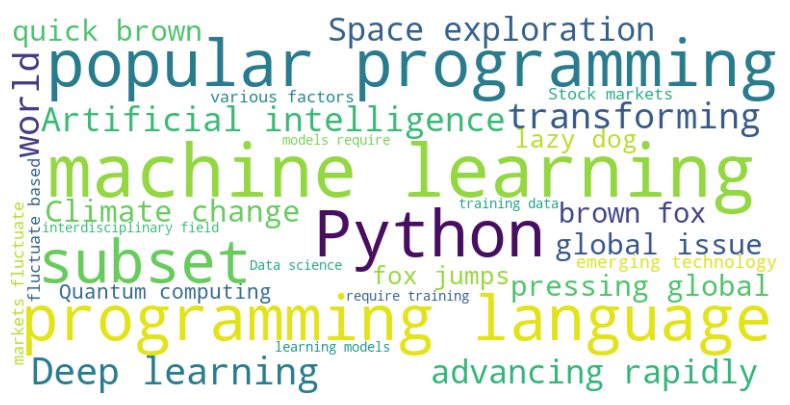

Word cloud image saved as wordcloud.png. You can download it from your working directory.


In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("sample_dataset.csv")

# Convert labels to binary (1 for 'Positive', 0 otherwise)
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'Positive' else 0)

# Generate word cloud text
text = " ".join(df['Text'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Save word cloud image
wordcloud_path = "wordcloud.png"
wordcloud.to_file(wordcloud_path)

# Show word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Provide the download link
print(f"Word cloud image saved as {wordcloud_path}. You can download it from your working directory.")


In [2]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/299.9 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 3.7 MB/s eta 0:00:00
